In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
df = pd.read_csv('two_dataset.csv')
df.rename(columns = {
    'study_hours' : 'study',
    'sleep_hours' : 'sleep',
    'attendance_percent' : 'attendance%'
}, inplace=True)
df.head()

,study,sleep,attendance%,score
0,3.9,4.0,99,78.8
1,7.8,4.8,83,89.5
2,4.9,6.7,91,56.4
3,7.1,7.5,81,75.2
4,7.1,7.3,82,73.1


In [9]:
x = df[['study', 'sleep', 'attendance%']].values.reshape(-1,3)
y = df['score'].values.reshape(-1,1)

sc = MinMaxScaler()
x_norm = sc.fit_transform(x)
jb.dump(sc, 'scaler_two.pkl')
yn = y.min()
yx = y.max()
y = (y-yn)/(yx-yn)

In [15]:
def score(study,sleep,attendance):
    model_path = 'two.keras'
    inp = np.array([[study, sleep, attendance]])
    sc = jb.load('scaler_two.pkl')
    inp = sc.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(3,), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        hist = model.fit(x_norm, y, epochs=500)
        model.save('two.keras')
        pred = model.predict(x_norm)
        lv = hist.history['loss']
        mae = mean_absolute_error(y, pred)
        mse = mean_squared_error(y, pred)
        rse = np.sqrt(mse)
        r2 = r2_score(y, pred)

        plt.figure()
        plt.plot(lv)
        plt.grid(True)
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.title('loss values')
        plt.show()

        plt.figure()
        plt.scatter(y, pred, label='actual vs predicted', color='pink')
        plt.grid(True)
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.legend()
        plt.title('Actual vs Predicted')
        plt.show()
    return model.predict(np.array(inp))[0][0]*(yx - yn)+yn

Epoch 1/500


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.2842
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2533
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2320
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2231
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1918
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1724
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1564
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1535
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1263
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1219
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1040
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0961
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0866
Epoch 14/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0769
Epoch 15/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0770
Epoch 16/500
2/2 ━━━━━━━━━━━━━━

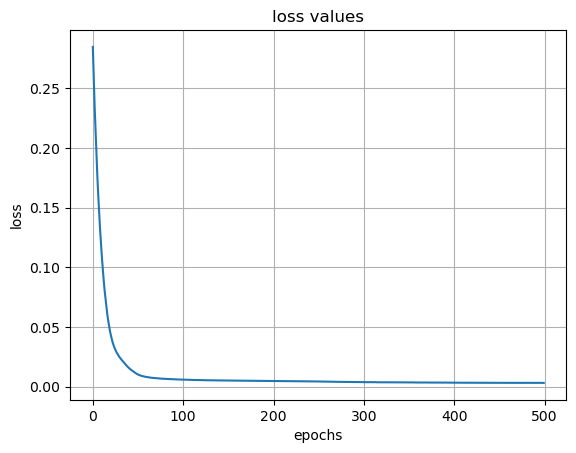

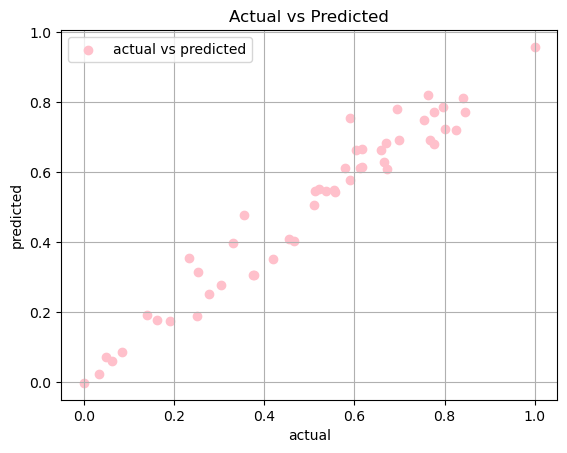

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
68.80859104394912
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
87.88729071617126
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
52.81551595032215


In [16]:
print(score(6.0, 7.0, 80))   # Expected: ~65
print(score(8.0, 6.0, 90))   # Expected: ~80
print(score(5.0, 8.0, 70))   # Expected: ~55
